<a href="https://colab.research.google.com/github/AndreaPoteYong/ANALITICA-DESCRIPTIVA/blob/main/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FUNDACION UNIVERSITARIA CAFA
# ANALITICA DESCRIPTIVA II
# *ANDREA CAROLINA POTE YONG*
# TALLER 1

##**Trabajo Aplicativo – Diagnóstico Inicial de Estadística Inferencial**




1. **Contexto Caso:**



In [17]:
import statistics as stats
import math

# Datos
tiempos = [48, 52, 50, 55, 47, 53, 49, 51, 50, 46]

media = stats.mean(tiempos)
mediana = stats.median(tiempos)
rango = max(tiempos) - min(tiempos)

varianza = stats.variance(tiempos)
desviacion = stats.stdev(tiempos)
cv = (desviacion / media) * 100

lim_inf = media - desviacion
lim_sup = media + desviacion
dentro_rango = [t for t in tiempos if lim_inf <= t <= lim_sup]
porcentaje_dentro = (len(dentro_rango) / len(tiempos)) * 100

print(f"Media: {media:.2f} min")
print(f"Mediana: {mediana} min")
print(f"Rango: {rango} min")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {desviacion:.2f} min")
print(f"Coeficiente de variación: {cv:.2f}%")

Media: 50.10 min
Mediana: 50.0 min
Rango: 9 min
Varianza: 7.66
Desviación estándar: 2.77 min
Coeficiente de variación: 5.52%


- los tiempos son consistentes.
- Sí es viable usar estos datos como base para proyecciones y mejoras.

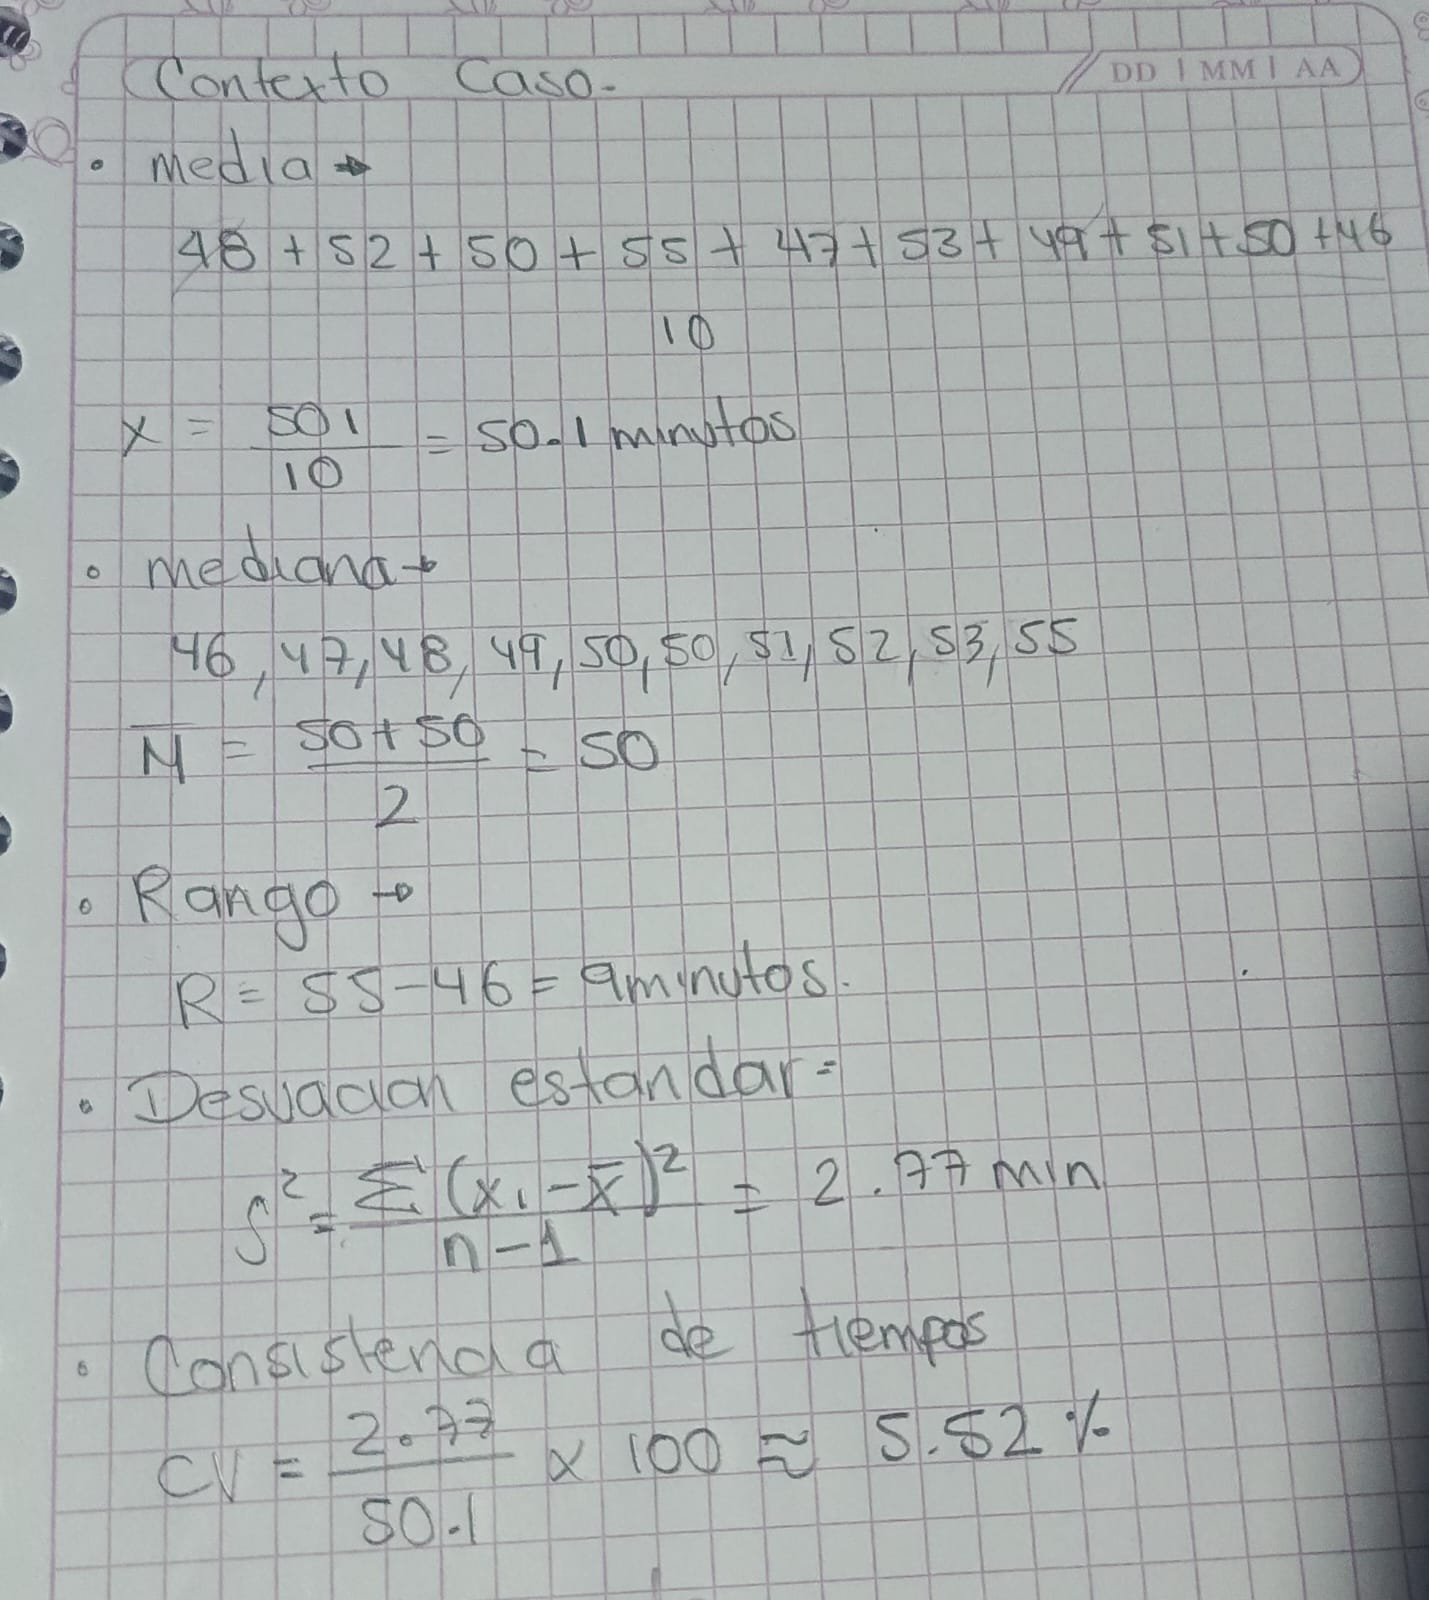



**2.   Actividad diagnostica**
- Estadistica descriptiva



In [18]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt


df = pd.read_excel("Taller1.xlsx")

from google.colab import files
uploaded = files.upload()

import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt

df = pd.read_excel("Taller1.xlsx")

#ELECCION DE COLUMNA
columna = df["Tiempo_Entrega_dias"]

#MEDIA
media = columna.mean()

#MEDIANA - MODA
mediana = columna.median()
try:
    moda = stats.mode(columna)
except:
    moda = columna.mode()[0]

#VARIANZA
varianza = columna.var(ddof=1)

#DESVIACION STANDAR
desviacion = columna.std(ddof=1)
cv = (desviacion / media) * 100

# SE IMPRIME
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda: {moda}")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Coeficiente de variación: {cv:.2f}%")



Saving Taller1.xlsx to Taller1 (2).xlsx



 Estadísticas descriptivas:
Media: 7.51
Mediana: 8.00
Moda: 10
Varianza: 21.34
Desviación estándar: 4.62
Coeficiente de variación: 61.52%


Se evidencia alta variación, eso quiere decir que no es estable.

- Representacion Grafica


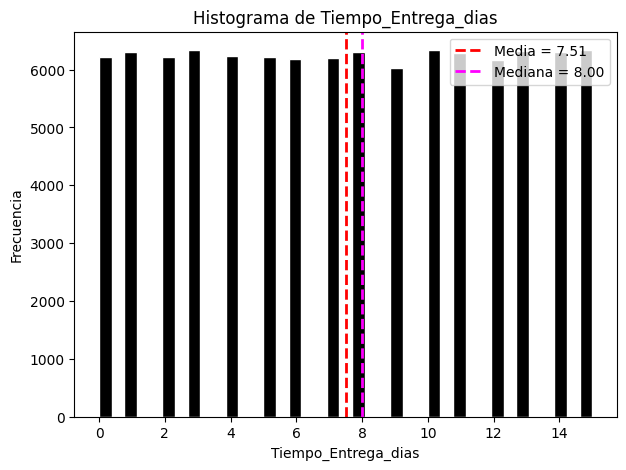

In [19]:
plt.figure(figsize=(7,5))
plt.hist(columna, bins='auto', color='black', edgecolor='white')  # Barras negras
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f"Media = {media:.2f}")
plt.axvline(mediana, color='fuchsia', linestyle='dashed', linewidth=2, label=f"Mediana = {mediana:.2f}")
plt.title("Histograma de " + columna.name)
plt.xlabel(columna.name)
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

Su compartamiento es proporcional, podria ser una distribucion normal ya que en la altura de las barras su desigualdad no es tan pronunciada.

- Probabilidad

In [20]:
#DATOS
tiempos = [48, 52, 50, 55, 47, 53, 49, 51, 50, 54]

# MENOS A 50
menor_50 = sum(1 for t in tiempos if t < 50)
probabilidad_menor_50 = menor_50 / len(tiempos)

# 48 a 52 minutos
aceptables = sum(1 for t in tiempos if 48 <= t <= 52)
porcentaje_aceptables = (aceptables / len(tiempos)) * 100

# SE IMPRIME
print(f"Probabilidad de tiempo < 50 min: {probabilidad_menor_50:.2f}")
print(f"Porcentaje de tiempos aceptables: {porcentaje_aceptables:.2f}%")


Probabilidad de tiempo < 50 min: 0.30
Porcentaje de tiempos aceptables: 60.00%


Hay un 30% de probabilidad de elegir un trabajador al azar y que su tiempo de ensamble de productos sea menor a 50 y el 60% de trabajadores cumplen con el tiempo aceptable.


- Idea de interferencia.
-- Poblacion: 200 operarios
-- Muestra: 10 operarios
-- Con media muestral podemos estimar el promedio poblacional y asi tener intervalos de confianza.
-- Informacion adicional: Control de medicion, Si hay grupos con otros turnos (noche, dia).
-- Sesgo: si los 10 operarios medidos trabajaban solo en el  turno de la mañana, y posiblemente en ese turno se tiene mas dedicacion y es más rápido que en la tarde, en ese caso la muestra no representaría a toda la población.

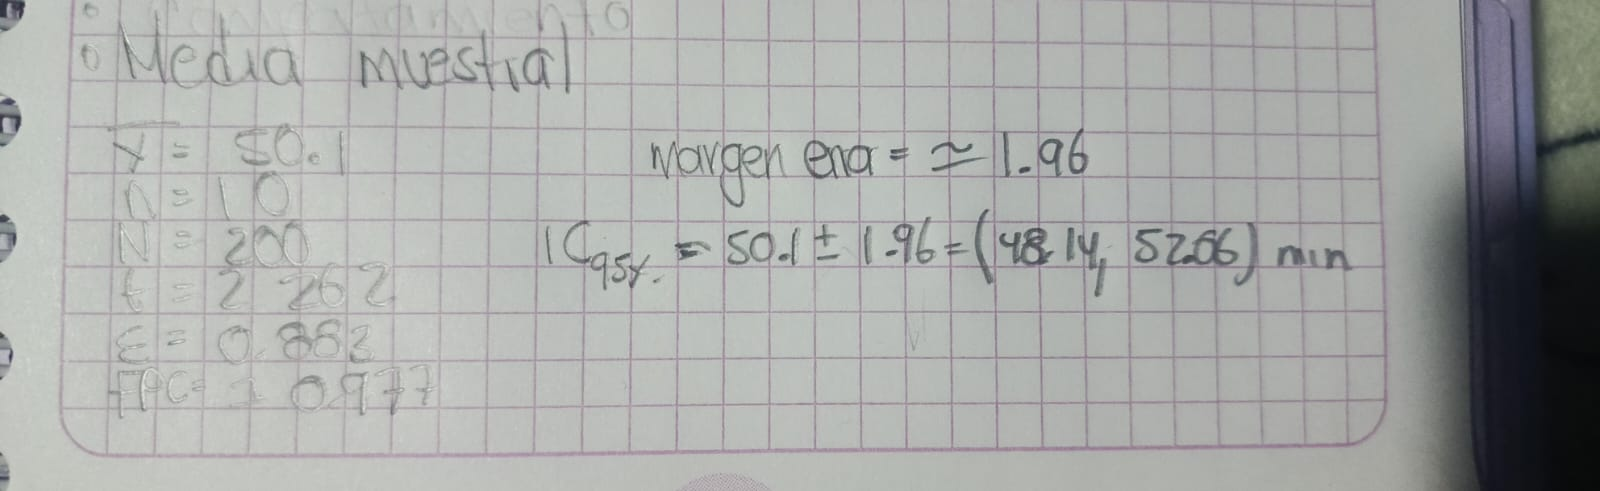